<a href="https://colab.research.google.com/github/FmRadioAlex/-----/blob/main/goit_data_hw_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [ ]:
# Завантажуємо датасет
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Нормалізуємо значення пікселів
x_train, x_test = x_train / 255.0, x_test / 255.0

# Перетворюємо матриці розміром 28x28 пікселів у вектор з 784 елементів
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Побудова моделі
model = models.Sequential()

# Додавання шарів
model.add(layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))


In [ ]:
# Компіляція моделі
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Тренування моделі
history = model.fit(x_train, y_train, epochs=20, batch_size=256, validation_split=0.2)

# Оцінка моделі на тестових даних
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

Epoch 1/20
188/188 [==============================] - 11s 40ms/step - loss: 0.6445 - accuracy: 0.7708 - val_loss: 0.4146 - val_accuracy: 0.8448
Epoch 2/20
188/188 [==============================] - 6s 30ms/step - loss: 0.4270 - accuracy: 0.8452 - val_loss: 0.3782 - val_accuracy: 0.8614
Epoch 3/20
188/188 [==============================] - 8s 44ms/step - loss: 0.3845 - accuracy: 0.8612 - val_loss: 0.3573 - val_accuracy: 0.8694
Epoch 4/20
188/188 [==============================] - 9s 47ms/step - loss: 0.3565 - accuracy: 0.8691 - val_loss: 0.3456 - val_accuracy: 0.8752
Epoch 5/20
188/188 [==============================] - 8s 44ms/step - loss: 0.3363 - accuracy: 0.8767 - val_loss: 0.3299 - val_accuracy: 0.8801
Epoch 6/20
188/188 [==============================] - 7s 35ms/step - loss: 0.3185 - accuracy: 0.8826 - val_loss: 0.3343 - val_accuracy: 0.8766
Epoch 7/20
188/188 [==============================] - 7s 39ms/step - loss: 0.3057 - accuracy: 0.8881 - val_loss: 0.3215 - val_accuracy: 0.880

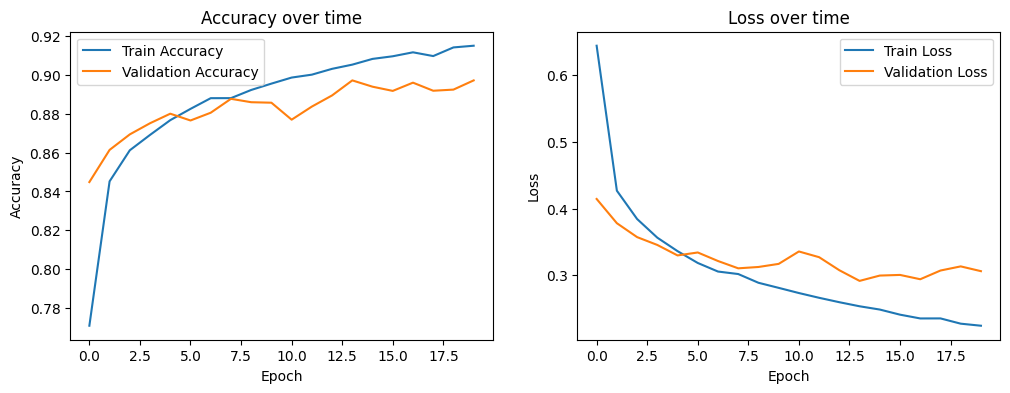

In [ ]:
# Графіки точності та втрат
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over time')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over time')

plt.show()

1/1 [==============================] - 0s 34ms/step


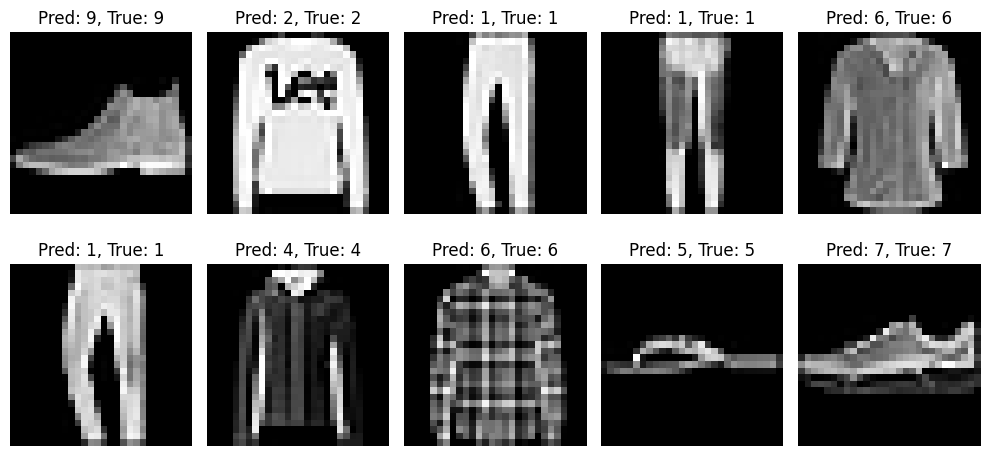

In [ ]:

# Протестуйте навчену нейромережу на 10 зображеннях
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.flatten()

for i in range(10):
    img = x_test[i].reshape(28, 28)
    pred = model.predict(np.expand_dims(x_test[i], 0))
    pred_label = np.argmax(pred)
    true_label = y_test[i]

    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"Pred: {pred_label}, True: {true_label}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()